Evaluate genes notebook
=======================

### Load pathes and dependencies ###

In [1]:
from pathlib import Path
if(Path("./data").exists()):
    base_dir = Path("./")
else:
    base_dir = Path("../")
print(base_dir.absolute())

data_dir = base_dir / "data"
input_dir = data_dir / "input"
output_dir =  data_dir / "output"
genes_dir = input_dir / "genes"
expressions_dir = input_dir / "expressions"

/data/sources/species/notebooks/..


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path_by_class = genes_dir / "by_animal_class"
path_all = genes_dir / "all"

def kids(folder: Path):    
    for d in folder.iterdir():
        print(d.absolute())
kids(genes_dir)

/data/sources/species/notebooks/../data/input/genes/by_animal_class
/data/sources/species/notebooks/../data/input/genes/by_animal_class.dvc


In [4]:
animal_classes = [ "Mammalia", "Aves", "Reptilia", "Teleostei", "Chondrichthyes", "Coelacanthi" ]

In [5]:
pd.set_option('display.max_columns', None)
import pprint
pp = pprint.PrettyPrinter(indent=4)


## Load gene tables ##

In [13]:
def load_table(path: Path, index: str = None, dtype: str = None):    
    if index is None:
        return pd.read_csv(str(path), sep="\t", index_col=False, dtype=dtype)
    else:
        return pd.read_csv(str(path), sep="\t", index_col=index, dtype=dtype)

from dataclasses import dataclass
@dataclass
class OrthologyTable:
    one2one: pd.DataFrame
    one2many: pd.DataFrame
    one2many_directed: pd.DataFrame
    one2oneplus_directed: pd.DataFrame
    many2many: pd.DataFrame
    all: pd.DataFrame
    
    def drop(self, column: str):
        self.one2one.drop(columns=[column], inplace=True)
        self.one2many.drop(columns=[column], inplace=True)
        self.one2many_directed.drop(columns=[column], inplace=True)
        self.many2many.drop(columns=[column], inplace=True)
        self.all.drop(columns=[column], inplace=True)        
        return self
            
def load_tables(folder :Path, index: str = None) -> OrthologyTable:
    return OrthologyTable(load_table(folder / "one2one.tsv", index, dtype='string'), 
                          load_table(folder / "one2many.tsv", index, dtype='string'), 
                          load_table(folder / "one2many_directed.tsv", index, dtype='string'), 
                          load_table(folder / "one2oneplus_directed.tsv", index, dtype='string'), 
                          load_table(folder / "many2many.tsv", index, dtype='string'), 
                          load_table(folder / "all.tsv", index, dtype='string'))


In [14]:
birds = load_tables(path_by_class / "Aves", "Homo_sapiens")
reptiles = load_tables(path_by_class / "Reptilia", "Homo_sapiens")
mammals = load_tables(path_by_class / "Mammalia", "Homo_sapiens")
mammals.all.head(4)

,Pan_troglodytes,Equus_caballus,Pan_paniscus,Tursiops_truncatus,Macaca_mulatta,Macaca_fascicularis,Macaca_nemestrina,Ailuropoda_melanoleuca,Ursus_americanus,Heterocephalus_glaber,Rhinolophus_ferrumequinum,Felis_catus,Sus_scrofa,Bos_grunniens,Ovis_aries,Callithrix_jacchus,Ornithorhynchus_anatinus,Phascolarctos_cinereus,Capra_hircus,Suricata_suricatta,Bos_taurus,Otolemur_garnettii,Microcebus_murinus,Sarcophilus_harrisii,Cavia_porcellus,Erinaceus_europaeus,Tupaia_belangeri,Oryctolagus_cuniculus,Meriones_unguiculatus,Cavia_aperea,Monodelphis_domestica,Mus_musculus,Mesocricetus_auratus,Rattus_norvegicus,Mus_spicilegus
Homo_sapiens,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000242265,ENSPTRG00000023648,ENSECAG00000001603,ENSPPAG00000030053,ENSTTRG00000003114,ENSMMUG00000032524,ENSMFAG00000045560,ENSMNEG00000037924,ENSAMEG00000019304,<NA>,<NA>,ENSRFEG00010011916,ENSFCAG00000041002,ENSSSCG00000036049,ENSBGRG00000010269,ENSOARG00000002475,ENSCJAG00000033086,<NA>,ENSPCIG00000028966,<NA>,ENSSSUG00005000112,ENSBTAG00000053735,ENSOGAG00000031169,ENSMICG00000001469,ENSSHAG00000001273,ENSCPOG00000037165,<NA>,<NA>,ENSOCUG00000027535,ENSMUGG00000022866;ENSMUGG00000022860,ENSCAPG00000010493,<NA>,ENSMUSG00000092035,ENSMAUG00000018656,<NA>,ENSMSIG00000000323
ENSG00000139990,ENSPTRG00000006478,ENSECAG00000010524,ENSPPAG00000042013,ENSTTRG00000013941,ENSMMUG00000019346,ENSMFAG00000003413,ENSMNEG00000028207,ENSAMEG00000014443,ENSUAMG00000010770,ENSHGLG00100003336;ENSHGLG00100017958;ENSHGLG0...,ENSRFEG00010004811,ENSFCAG00000029516,ENSSSCG00000039701,ENSBGRG00000007044,ENSOARG00000021180,ENSCJAG00000042954,ENSOANG00000012620,ENSPCIG00000010372,ENSCHIG00000021848,ENSSSUG00005006529,ENSBTAG00000048519,ENSOGAG00000008452,ENSMICG00000046667,ENSSHAG00000000665,ENSCPOG00000032392,ENSEEUG00000011616,<NA>,ENSOCUG00000010281,ENSMUGG00000023917,ENSCAPG00000014053,ENSMODG00000010219,ENSMUSG00000049106,ENSMAUG00000004350,ENSRNOG00000004556,ENSMSIG00000015740
ENSG00000073921,ENSPTRG00000004141,ENSECAG00000019264,ENSPPAG00000036162,ENSTTRG00000001554,ENSMMUG00000019618,ENSMFAG00000002978,ENSMNEG00000029285,ENSAMEG00000008778,ENSUAMG00000018059,ENSHGLG00100018440,ENSRFEG00010012989,ENSFCAG00000029123,ENSSSCG00000014913,ENSBGRG00000024679,ENSOARG00000004654,ENSCJAG00000014262,ENSOANG00000013205,ENSPCIG00000018862,ENSCHIG00000015634,ENSSSUG00005014072,ENSBTAG00000001657,ENSOGAG00000013950,ENSMICG00000017261,ENSSHAG00000004629,ENSCPOG00000020758,ENSEEUG00000013932,ENSTBEG00000000600,ENSOCUG00000023809,ENSMUGG00000002616,ENSCAPG00000000355,ENSMODG00000004297,ENSMUSG00000039361,ENSMAUG00000011448,ENSRNOG00000018322,ENSMSIG00000002381
ENSG00000139687,ENSPTRG00000005864,ENSECAG00000014575,ENSPPAG00000002165,ENSTTRG00000004232,ENSMMUG00000007891,ENSMFAG00000004544,ENSMNEG00000030265,ENSAMEG00000003640,ENSUAMG00000011956,ENSHGLG00100008595,ENSRFEG00010000766,ENSFCAG00000024529,ENSSSCG00000009401,ENSBGRG00000020100,ENSOARG00000008246,ENSCJAG00000009076,ENSOANG00000031580;ENSOANG00000015555,ENSPCIG00000029307,ENSCHIG00000004374,ENSSSUG00005003247,ENSBTAG00000006640,ENSOGAG00000007461,ENSMICG00000001747,ENSSHAG00000014024,ENSCPOG00000008683,ENSEEUG00000000076,ENSTBEG00000014454,ENSOCUG00000016404,ENSMUGG00000019124,ENSCAPG00000014795,ENSMODG00000011168,ENSMUSG00000022105,ENSMAUG00000020865,ENSRNOG00000016029,ENSMSIG00000007265


In [15]:
(mammals.all.shape, mammals.one2one.shape)

((67996, 35), (67996, 35))

# Missing value analysis #

## Plot missing genes for all species and mammals (one2one and all modes) ##

In [16]:
def show_missing(df: pd.DataFrame, title: str = "missing plot", ax = None):
     return sns.heatmap(df.notnull(), cbar=False,ax=ax).set_title(title)        

In [43]:
def missing_values(table: OrthologyTable, name: str = None):
    fig, axs = plt.subplots(2,3,figsize=(20,12))
    if not name is None:
        fig.suptitle(name, fontsize=16)
    sns.heatmap(table.one2one.notnull(), cbar=False,ax=axs[0,0]).set_title('one2one')    
    sns.heatmap(table.one2oneplus_directed.notnull(), cbar=False,ax=axs[0,1]).set_title('one2oneplus_directed')
    sns.heatmap(table.all.notnull(), cbar=False, ax=axs[0,2]).set_title('ALL')    
    sns.heatmap(table.one2many.notnull(), cbar=False,ax=axs[1,0]).set_title('One2Many')
    sns.heatmap(table.one2many_directed.notnull(), cbar=False,ax=axs[1,1])
    sns.heatmap(table.many2many.notnull(), cbar=False,ax=axs[1,2]).set_title('Many2Many')

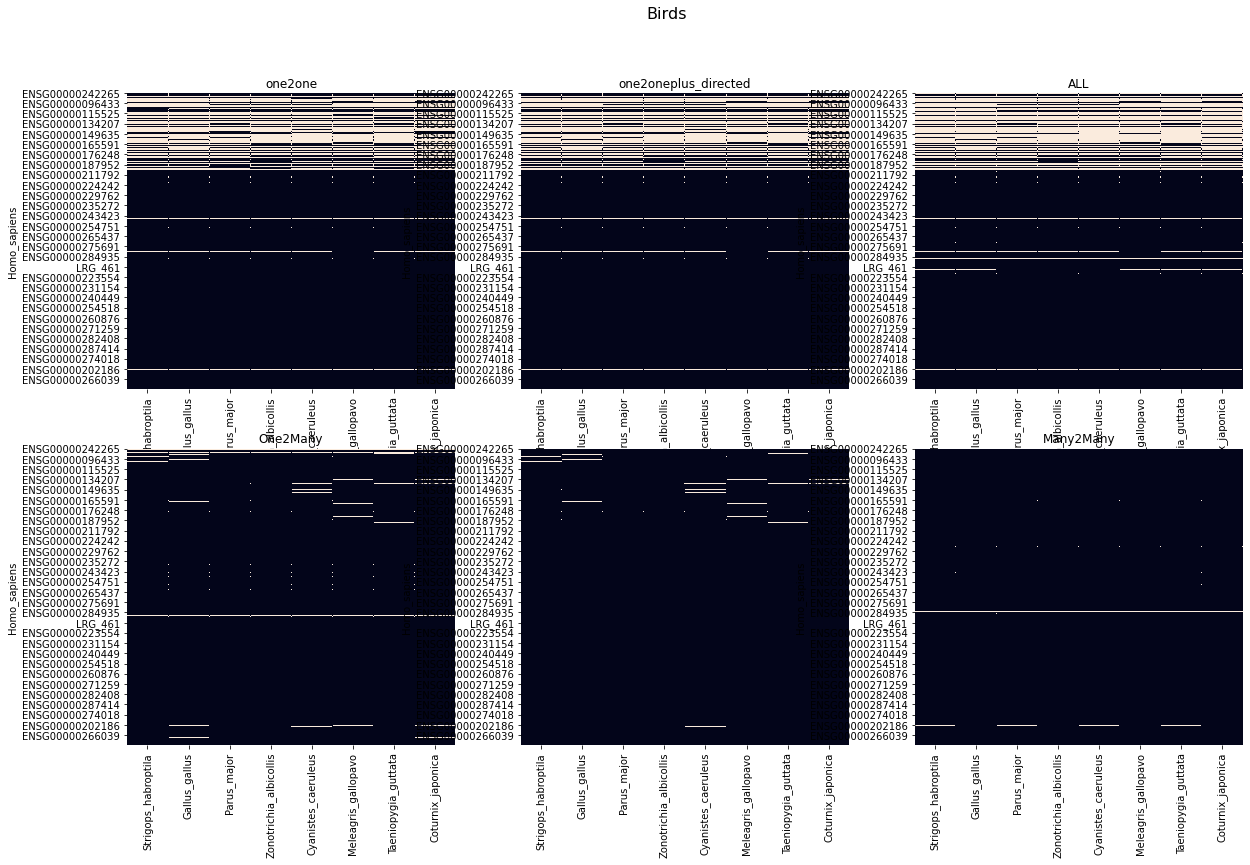

In [44]:
missing_values(birds, "Birds")

### Load species ###

In [82]:
species = load_table(input_dir / "species.tsv")
species.head(3)

,species,common_name,animal_class,lifespan,ensembl_url,mass_g,metabolic_rate,temperature_kelvin,taxon
0,:Serinus_canaria,House canary,ens:Aves,24.0,https://www.ensembl.org/Serinus_canaria,13.3,0.230065,314.15,ens:taxon#9135
1,:Melopsittacus_undulatus,Budgerigar,ens:Aves,21.0,https://www.ensembl.org/Melopsittacus_undulatus,25.2,0.303500,314.15,ens:taxon#13146
2,:Homo_sapiens,Human,ens:Mammalia,122.5,https://www.ensembl.org/Homo_sapiens,70000.0,82.780000,310.15,ens:taxon#9606


### Count genes ###

In [47]:
def gc(df: pd.DataFrame, species: pd.DataFrame = None, index_field: str = None) -> pd.DataFrame:
    frame = df.notna().sum().sort_values(ascending=False).to_frame("genes")
    result = frame.reset_index().rename( columns= {"index": "species"})
    if species is None:
        return result
    else:
        field = "common_name" if index_field is None else index_field        
        return result.merge(species, on="species", how="inner").set_index(field)

In [48]:
def gene_counts(table: OrthologyTable, species: pd.DataFrame = None, field: str = None, name: str = None):
    fig, axs = plt.subplots(2,2 ,figsize=(20,20))
    if not name is None:
        fig.suptitle(name, fontsize=16)
    plt.subplots_adjust(left=0.2, bottom=0.5, right=0.9, top=0.9, wspace=0.2, hspace=1)
    rot = 75
    gc(table.all, species,field).genes.plot(kind="bar", ax = axs[0,0], rot=rot)
    gc(table.one2one, species,field).genes.plot(kind="bar", ax = axs[0,1], rot=rot)    
    #(table.all.notna().sum() - table.one2one.notna().sum()).sort_values(ascending=False).plot(kind="bar", ax = axs[1,0], rot=rot)
    gc(table.many2many.isna(), species).genes.plot(kind="bar", ax = axs[1,1], rot=rot)

Text(0.5, 1.0, 'missing plot')

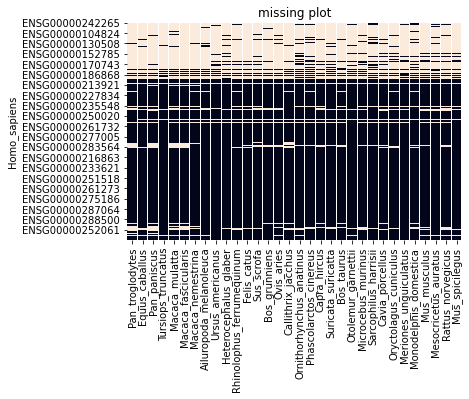

In [49]:
show_missing(mammals.all.drop(columns = ["Cavia_aperea", "Tupaia_belangeri", "Erinaceus_europaeus"]))

In [50]:
mammals.all.drop(columns = ["Cavia_aperea", "Tupaia_belangeri", "Erinaceus_europaeus"]).dropna().shape

(6282, 32)

In [51]:
mammals.one2one.drop(columns = ["Cavia_aperea", "Tupaia_belangeri", "Erinaceus_europaeus"]).dropna().shape

(2742, 32)

In [52]:
mammals.one2oneplus_directed.drop(columns = ["Cavia_aperea", "Tupaia_belangeri", "Erinaceus_europaeus"]).dropna().shape

(6035, 32)

In [56]:
birds.one2oneplus_directed.dropna().shape

(9015, 8)

# Samples extended #

In [76]:
samples = load_table(input_dir / "samples.tsv")
samples.head(3)

,bioproject,series,run,species,tissue,sample_name,characteristics,sequencer,age,sex,tumor,source,study,study_title,salmon_version,library_layout,library_selection,library_strategy,lib_type,bootstrap,modified,protocol
0,ncbi:bioproject/PRJNA247712,ncbi:bioproject/PRJNA247712,sra:SRR1287653,:Ailuropoda_melanoleuca,:Blood,SL01,'Tumor:no;BioSampleModel:Model organism or ani...,samples:Illumina_HiSeq_2000,19,female,samples:no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,samples:PAIRED,samples:PCR,samples:RNA-Seq,A,96,2020-03-09 18:13:39.812,NaN
1,ncbi:bioproject/PRJNA247712,ncbi:bioproject/PRJNA247712,sra:SRR1287654,:Ailuropoda_melanoleuca,:Blood,XB01,'Tumor:no;BioSampleModel:Model organism or ani...,samples:Illumina_HiSeq_2000,12,male,samples:no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,samples:PAIRED,samples:PCR,samples:RNA-Seq,A,96,2020-02-18 18:40:17.122,NaN
2,ncbi:bioproject/PRJNA247712,ncbi:bioproject/PRJNA247712,sra:SRR1287655,:Ailuropoda_melanoleuca,:Blood,XB02,'Tumor:no;BioSampleModel:Model organism or ani...,samples:Illumina_HiSeq_2000,6,female,samples:no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,samples:PAIRED,samples:PCR,samples:RNA-Seq,A,128,2020-02-20 15:23:40.197,NaN


In [88]:
samples_ext.groupby("tissue").run.count()

tissue
:Blood      7
:Brain     64
:Heart     23
:Kidney    46
:Liver     76
:Lung      19
:Mix        1
:Muscle     3
Name: run, dtype: int64

In [58]:
samples_ext = samples.merge(species,on="species", how="inner")
samples_ext.head(3)

,bioproject,series,run,species,tissue,sample_name,characteristics,sequencer,age,sex,tumor,source,study,study_title,salmon_version,library_layout,library_selection,library_strategy,lib_type,bootstrap,modified,protocol,common_name,animal_class,lifespan,ensembl_url,mass_g,metabolic_rate,temperature_kelvin,taxon
0,ncbi:bioproject/PRJNA210317,ncbi:bioproject/PRJNA210317,sra:SRR924544,:Bos_taurus,:Blood,GSM1179805,source_name:Poly A+ RNA from peripheral white ...,samples:Illumina_Genome_Analyzer_IIx,NaN,NaN,samples:no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,Characterization and Comparison of the Leukocy...,0.14.1,samples:PAIRED,samples:cDNA,samples:RNA-Seq,A,128,NaN,Tail vein blood was collected from 40 Holstein...,Domestic cattle,ens:Mammalia,20.0,https://www.ensembl.org/Bos_taurus,347000.0,306.77,311.15,ens:taxon#9913
1,ncbi:bioproject/PRJNA309284,ncbi:bioproject/PRJNA309284,sra:SRR3109705,:Bos_taurus,:Liver,GSM2042593,"'Tumor:no;strain:indigenous;location:Chengdu, ...",samples:Illumina_HiSeq_2500,~4 years old,NaN,samples:no,liver,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,Multi-tissue RNA-seq data across three species,0.14.1,samples:PAIRED,samples:cDNA,samples:RNA-Seq,A,128,2019-08-08 11:45:53.723,The total RNA was extracted using the TrIzol r...,Domestic cattle,ens:Mammalia,20.0,https://www.ensembl.org/Bos_taurus,347000.0,306.77,311.15,ens:taxon#9913
2,ncbi:bioproject/PRJNA309284,ncbi:bioproject/PRJNA309284,sra:SRR3109709,:Bos_taurus,:Kidney,GSM2042597,"'Tumor:no;strain:indigenous;location:Chengdu, ...",samples:Illumina_HiSeq_2500,~4 years old,NaN,samples:no,kidney,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,Multi-tissue RNA-seq data across three species,0.14.1,samples:PAIRED,samples:cDNA,samples:RNA-Seq,A,128,2019-08-08 11:48:35.7,The total RNA was extracted using the TrIzol r...,Domestic cattle,ens:Mammalia,20.0,https://www.ensembl.org/Bos_taurus,347000.0,306.77,311.15,ens:taxon#9913


In [70]:
samples_ext.loc[samples_ext.animal_class == "ens:Aves"]#.groupby("tissue").run.count()

,bioproject,series,run,species,tissue,sample_name,characteristics,sequencer,age,sex,tumor,source,study,study_title,salmon_version,library_layout,library_selection,library_strategy,lib_type,bootstrap,modified,protocol,common_name,animal_class,lifespan,ensembl_url,mass_g,metabolic_rate,temperature_kelvin,taxon


In [79]:
samples_ext.animal_class.unique

<bound method Series.unique of 0      ens:Mammalia
1      ens:Mammalia
2      ens:Mammalia
3      ens:Mammalia
4      ens:Mammalia
           ...     
234    ens:Mammalia
235    ens:Mammalia
236    ens:Mammalia
237    ens:Mammalia
238    ens:Mammalia
Name: animal_class, Length: 239, dtype: object>

In [80]:
samples_ext.shape

(239, 30)

In [81]:
samples.shape

(533, 22)